Build a model to forecast the demand(passenger traffic) in Airplanes. The data is classified in data time and the passengers travelling per month

In [1]:
import numpy as np  
import pandas as pd    #  data processing
import matplotlib.pyplot as plt   #data visualization
from matplotlib.pyplot import rcParams   #define size..
rcParams['figure.figsize'] = 10, 6

In [2]:
dataset = pd.read_csv("AirPassengers.csv")
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# parse strings to datetime type
# we are passing those strings in a datetime format

dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
dataset = dataset.set_index(['Month'])



In [4]:
from datetime import datetime
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
dataset.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


C:\Users\ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


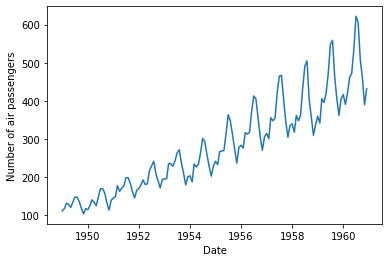

In [6]:
#plot graph

plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(dataset)

so here we can observe it is Trend. so this is non-stationary because here the mean is not constant(the mean of year 1952 is less than year 1960) the Trend is moving upwards

There are two test to check stationary of the data

In [7]:
#determining the rolling statistics 

rolmean = dataset.rolling(window=12).mean()  # here window is months,rolling mean at yearly level 

rolstd  = dataset.rolling(window=12).std()

print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


In [8]:
#determining the rolling statistics 

rolmean = dataset.rolling(window=12).mean()  # here window is months,rolling mean at yearly level 

rolmean.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [9]:
#determining the rolling statistics 

rolstd = dataset.rolling(window=12).std()  # here window is months,rolling mean at yearly level 

rolstd.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


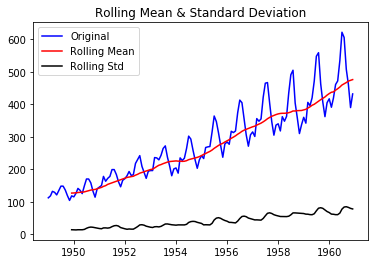

In [10]:
#plot rolling statistics

orig = plt.plot(dataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

by this we can say that the mean and std are not constant.so here the data is not stationary

In [11]:
#Determining the Dickey-Fuller test:

from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test:")

dftest = adfuller(dataset["#Passengers"], autolag = 'AIC')   

#aic gives the info of what you want in time series,the exact values,actual values and it analyse the diff b/w them

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
    
    
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


here Null hypothesis says p-value should always be less, p-value should be 0.5, the critical value should be more than the Test Statistic.... so here we cannot reject Null hypothesis and we cannot say that the data is not stationary.
if Critical value and Test Statistics are equal which basic helps to dtermine whther the data is stationary or not

so now we will estimate the Trend

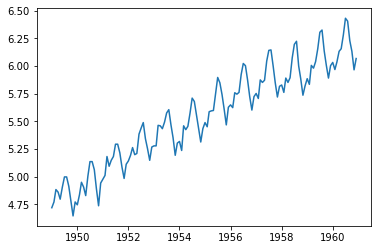

In [12]:
#estimating Trend
dataset_log = np.log(dataset)  #here the value of y-axis changed
plt.plot(dataset_log)

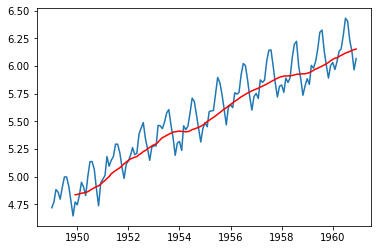

In [13]:
MovingAverage = dataset_log.rolling(window=12).mean()
MovingStd = dataset_log.rolling(window=12).std()

plt.plot(dataset_log)
plt.plot(MovingAverage, color = 'red')

here you conclude that mean is not stationary...but it is better than the previous one

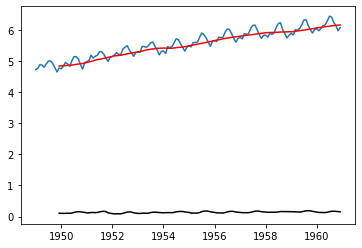

In [14]:
 MovingAverage = dataset_log.rolling(window=12).mean()
MovingStd = dataset_log.rolling(window=12).std()

plt.plot(dataset_log)
plt.plot(MovingAverage, color = 'red')
plt.plot(MovingStd, color = 'black')

In [15]:
#we get diff b/w moving avg and actual number of passengers
#now we have mean and actual time series
#reason-unless we perform all these transformations..will not get time series as stationary..
#it depends on us sometime we will take log or sometime square root or cubic root


In [16]:
dataset_logMinusMovingAvg = dataset_log - MovingAverage

In [17]:
dataset_logMinusMovingAvg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [18]:
#remove NaN values
dataset_logMinusMovingAvg.dropna(inplace=True)
dataset_logMinusMovingAvg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


Actual code  -  Main code
it is ADCF test = Argument Dickey Fuller test
so have to perfom this whenever have to determine the TS is stationary or not...

In [19]:
#Determining the Dickey-Fuller test:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determining the rolling statistics 

    MovingAverage = timeseries.rolling(window=12).mean()  # here window is months,rolling mean at yearly level 

    MovingStd  = timeseries.rolling(window=12).std()

    #plot rolling statistics:
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MovingAverage, color='red', label = 'Rolling Mean')
    std = plt.plot(MovingStd, color='black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    
    
    #Determining the Dickey-Fuller test:
    
    print("Results of Dickey-Fuller Test:")

    dftest = adfuller(timeseries["#Passengers"], autolag = 'AIC')   

    #aic gives the info of what you want in time series,the exact values,actual values and it analyse the diff b/w them

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])

    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    
    
    print(dfoutput)
    
    

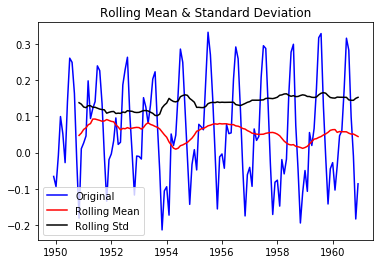

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of observations used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [20]:
test_stationarity(dataset_logMinusMovingAvg)

so here we can see that their is no such Trend...it is much better than what we see eariler

In [21]:
#we need to see Trend that is present inside the Timeseries..
#for that we need to calculate the weighted avg series

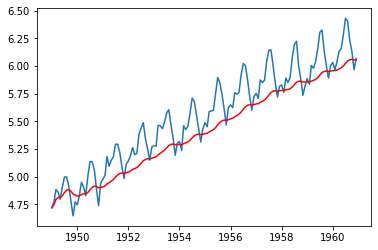

In [22]:
exponentialDecayWeightedAverage = dataset_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(dataset_log)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

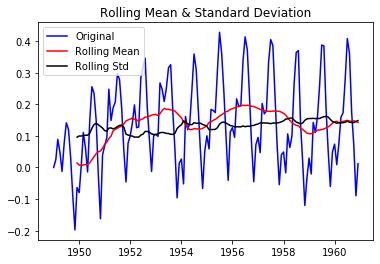

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags used                      13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [23]:
datasetlogMinusExponentialDecayAverage = dataset_log - exponentialDecayWeightedAverage
test_stationarity(datasetlogMinusExponentialDecayAverage)

it is better than the previous one
by this we can conclude the data is stationary

Shift the values into time series to use in Forecasting

In [24]:
datasetlogDiffShifting = dataset_log - dataset_log.shift()

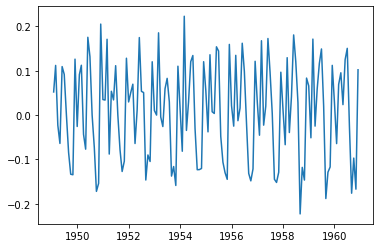

In [25]:
plt.plot(datasetlogDiffShifting)

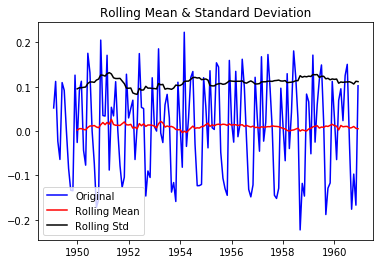

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags used                      14.000000
Number of observations used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64


In [26]:
datasetlogDiffShifting.dropna(inplace = True)
test_stationarity(datasetlogDiffShifting)

Components of Time Series

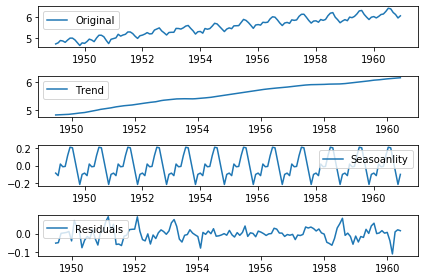

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasoanlity')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()




Residuals are nothing but irregularity present in the data

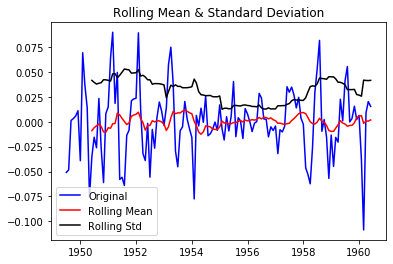

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags used                     9.000000e+00
Number of observations used    1.220000e+02
Critical value (1%)           -3.485122e+00
Critical value (5%)           -2.885538e+00
Critical value (10%)          -2.579569e+00
dtype: float64


In [28]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

by visualy we can say it is not looking as stationary..that is why we have Moving avg.that smoothens it out  to predict what will happen it next

C:\Users\ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


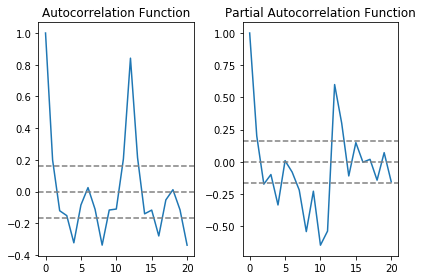

In [29]:
#graphs and PACF graphs

from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetlogDiffShifting, nlags=20)
lag_pacf = pacf(datasetlogDiffShifting, nlags=20, method='ols')

#plot ACF:  q =  AutoCorrelation graph

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle = '--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle = '--',color='gray')
plt.title('Autocorrelation Function')


#plot PACF: p   =  partial AutoCorrelation

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle = '--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle = '--',color='gray')
plt.title('Partial Autocorrelation Function')

          
plt.tight_layout()
          


p & q= need to check where the graph drops to zero for the first time on y axis note tha value on x axis

C:\Users\ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


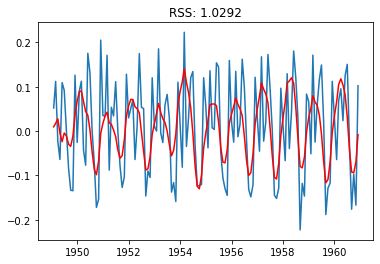

In [30]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model

model = ARIMA(dataset_log, order = (2,1,2))   #p, d, q
results_AR = model.fit(disp = 1)
plt.plot(datasetlogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title("RSS: %.4f"% sum((results_AR.fittedvalues-datasetlogDiffShifting["#Passengers"])**2))
print("Plotting AR model")

C:\Users\ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


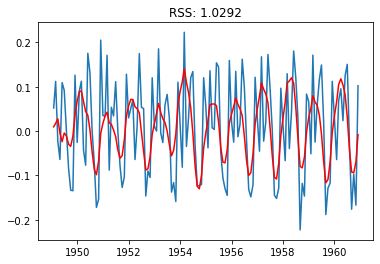

In [31]:
#MA model

model = ARIMA(dataset_log, order = (2,1,2))   #p, d, q
results_MA = model.fit(disp = 1)
plt.plot(datasetlogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title("RSS: %.4f"% sum((results_MA.fittedvalues-datasetlogDiffShifting["#Passengers"])**2))
print("Plotting MA model")

C:\Users\ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


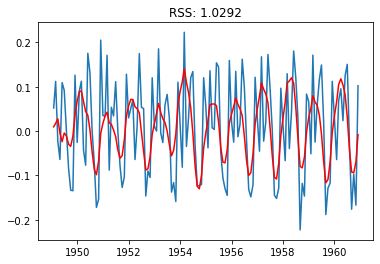

In [32]:
model = ARIMA(dataset_log, order = (2,1,2))   #p, d, q
results_ARIMA = model.fit(disp = 1)
plt.plot(datasetlogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title("RSS: %.4f"% sum((results_ARIMA.fittedvalues-datasetlogDiffShifting["#Passengers"])**2))
print("Plotting ARIMA model")

In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)   #in Series fromat
print(predictions_ARIMA_diff)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64


In [35]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [36]:
predictions_ARIMA_Log = pd.Series(dataset_log["#Passengers"].ix[0],index = dataset_log.index)
predictions_ARIMA_Log = predictions_ARIMA_Log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_Log.head()

C:\Users\ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

explanent  of the data

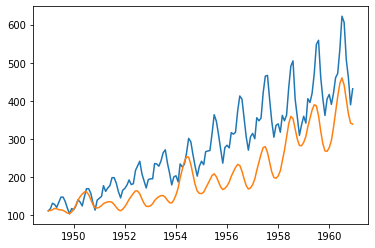

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_Log)
plt.plot(dataset)
plt.plot(predictions_ARIMA)

Orange line is the model that we have fitted.....only magnitude is changed. 

In [39]:
dataset_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


so here we want predict  it for 20 years....here there are 12 datapoints for 1 year... so for 10 years it will be 240.  total is 144+120 = 384

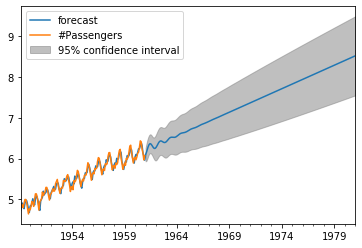

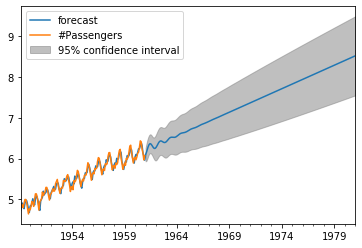

In [46]:
results_ARIMA.plot_predict(1,384)

BLUE is Forecasted value,,.......  GREY is Confidence level.........this value will not exceed confidence level..

In [47]:
results_ARIMA.forecast(steps=240)

(array([6.09553395, 6.15281407, 6.22442969, 6.29241101, 6.34164712,
        6.36359354, 6.35784674, 6.33139291, 6.29597527, 6.26447702,
        6.24738315, 6.25025163, 6.27275828, 6.30940303, 6.35151483,
        6.38988642, 6.41727365, 6.43011036, 6.42906669, 6.41842467,
        6.40456133, 6.39403594, 6.39183062, 6.40019483, 6.41833672,
        6.44295387, 6.46937414, 6.49293962, 6.51024093, 6.51989006,
        6.52267549, 6.52112357, 6.51864496, 6.51853659, 6.52311892,
        6.5332233 , 6.54812839, 6.56591526, 6.58410276, 6.60036506,
        6.61313231, 6.62192744, 6.6273775 , 6.63093089, 6.63438649,
        6.63937944, 6.64696464, 6.657398  , 6.67015284, 6.6841421 ,
        6.69806584, 6.71077857, 6.72157686, 6.73033937, 6.73749762,
        6.74386329, 6.75037273, 6.75782543, 6.76668632, 6.77699773,
        6.78841268, 6.80032802, 6.81207141, 6.82308706, 6.8330708 ,
        6.84202436, 6.85022254, 6.85811162, 6.86617281, 6.87479091,
        6.88416242, 6.89426323, 6.90487828, 6.91